Task : Restaurant recommendation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Dataset .csv')

In [3]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [6]:
df = df.drop(['Restaurant ID','Is delivering now'],axis=1)

In [7]:
df = df.drop(['Locality','Locality Verbose','Longitude','Latitude'],axis=1)


In [9]:
df = df.drop(['Country Code','Switch to order menu',],axis=1)

In [11]:
df = df.drop(['Has Table booking'],axis=1)

In [12]:
df.head()

,Restaurant Name,City,Address,Cuisines,Average Cost for two,Currency,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","French, Japanese, Desserts",1100,Botswana Pula(P),No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",Japanese,1200,Botswana Pula(P),No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),No,4,4.4,Green,Very Good,270
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","Japanese, Sushi",1500,Botswana Pula(P),No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","Japanese, Korean",1500,Botswana Pula(P),No,4,4.8,Dark Green,Excellent,229


In [17]:
df['Rating color'].value_counts()

,count
Rating color,
Orange,3737
White,2148
Yellow,2100
Green,1079
Dark Green,301
Red,186


In [18]:
df['Rating text'].value_counts()

,count
Rating text,
Average,3737
Not rated,2148
Good,2100
Very Good,1079
Excellent,301
Poor,186


In [19]:
df['Votes'].value_counts()

,count
Votes,
0,1094
1,483
2,327
3,244
4,207
...,...
615,1
538,1
823,1


In [20]:
df['Currency'].value_counts()

,count
Currency,
Indian Rupees(Rs.),8652
Dollar($),482
Pounds(��),80
Brazilian Real(R$),60
Emirati Diram(AED),60
Rand(R),60
NewZealand($),40
Turkish Lira(TL),34
Botswana Pula(P),22


In [21]:
df['Restaurant Name'].value_counts()

,count
Restaurant Name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
...,...
Odeon Social,1
Johnny Rockets,1
House of Commons,1


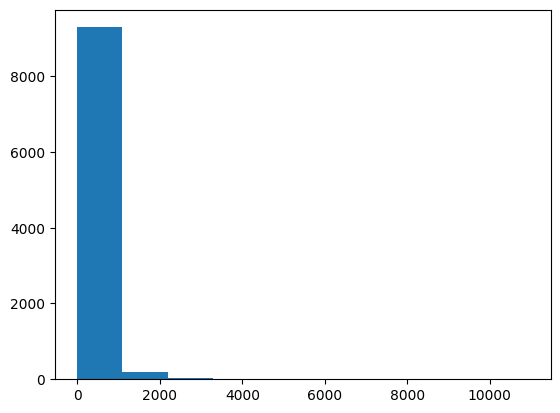

In [24]:
plt.hist(df['Votes'])
plt.show()

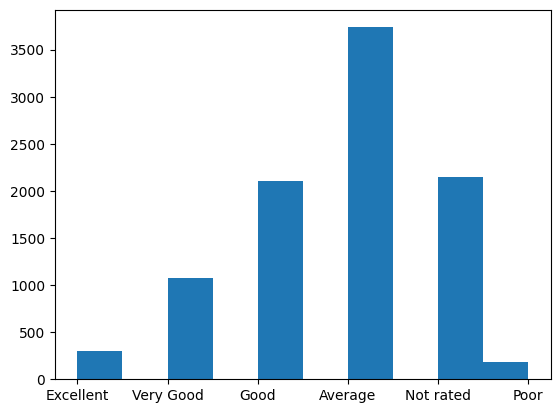

In [25]:
plt.hist(df['Rating text'])
plt.show()

In [ ]:
plt.hist(df,bins=5,edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Italian, World Cuisine',
       'Restaurant Cafe', 'Cafe'], dtype=object)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function flush_figures at 0x7b46e9eeca40> (for post_execute):
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/events.py", line 89, in trigger
    func(*args, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py", line 126, in flush_figures
    return show(True)
           ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/display.py", line 320, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
           ^^^^^^^^^^^^^^
  File "<decorator-gen-2>", line 2, in __call__
  File "/usr/local/lib/python3.11/dist-packages/IPytho